In [59]:
import pandas as pd
import numpy as np
import seaborn as sea

Reading the fake news file

In [60]:
df_fake = pd.read_csv('C:\\Users\\kusha\\DAI_1\\Fake_news_project\\Fake.csv\\Fake.csv')


In [61]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


Reading the true news

In [62]:
df_true=pd.read_csv("C:\\Users\\kusha\\DAI_1\\Fake_news_project\\True.csv\\True.csv")

Labelling the true news and fake news

In [63]:
df_fake["label"] = 1 
df_true["label"] = 0 

Combining both true news and fake news

In [64]:
df_combined = pd.concat([df_fake, df_true], ignore_index=True)
df_combined = df_combined.sample(frac=1).reset_index(drop=True)


In [65]:
df_combined.to_csv("news_dataset.csv", index=False)

In [66]:
df_combined.head(10)

,title,text,subject,date,label
0,TV Host Buys and Forgives $15m Worth of U.S. M...,21st Century Wire says This latest stunt only ...,Middle-east,"June 7, 2016",1
1,U.S. Tillerson assures Washington's only goal ...,MOSCOW (Reuters) - U.S. Secretary of State Rex...,worldnews,"October 12, 2017",0
2,Obama allies to press Republicans on high cour...,WASHINGTON (Reuters) - As the Senate began a t...,politicsNews,"March 18, 2016",0
3,Marco Rubio’s Friend Thinks He Needs To See A...,When Marco Rubio announced that he was running...,News,"February 8, 2016",1
4,FOX NEWS ANCHOR SHEPARD SMITH GOES ON A HUGE A...,Unprofessional? For those of you who might not...,left-news,"Sep 8, 2015",1
5,Trump's tax cut proposal shines light on MLPs,NEW YORK/HOUSTON (Reuters) - The Trump adminis...,politicsNews,"April 26, 2017",0
6,A Must Watch Video! Brilliant Take On How Hill...,"Hillary Clinton breaks the law, gets people wh...",Government News,"Oct 25, 2015",1
7,BREAKING: Megyn Kelly Just Gave The Ultimate ...,It seems that Fox News repeated decisions to ...,News,"January 3, 2017",1
8,Indonesian minister to meet Suu Kyi amid prote...,JAKARTA (Reuters) - Indonesia s foreign minist...,worldnews,"September 4, 2017",0
9,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,left-news,"Aug 27, 2017",1


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [68]:
X = df_combined['text'] 
y = df_combined['label']

In [69]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

Splitting the dataset-> 40% training data, 20% validation,40% testdata

In [70]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)


Tokenization-> Using CountVectorizer(Bag of  words)

In [71]:

X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)


K-fold cross Validation to tune the hyperparameters

In [80]:
from sklearn.model_selection import GridSearchCV

param = {
    'C': [0.01, 0.1, 1, 10],              
    'penalty': ['l2'],                   
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_vectorized, y_train)

print("Hyperparameters:", grid.best_params_)

val_pred = grid.predict(X_val_vectorized)
val_acc = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")


Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.9937


In [73]:

X_final = vectorizer.fit_transform(list(X_train) + list(X_val))
y_final = list(y_train) + list(y_val)

final_model = LogisticRegression(**grid.best_params_)
final_model.fit(X_final, y_final)

X_test_vectorized = vectorizer.transform(X_test)
y_pred = final_model.predict(X_test_vectorized)

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.994097995545657


In [73]:

X_final = vectorizer.fit_transform(list(X_train) + list(X_val))
y_final = list(y_train) + list(y_val)

final_model = LogisticRegression(**grid.best_params_)
final_model.fit(X_final, y_final)

X_test_vectorized = vectorizer.transform(X_test)
y_pred = final_model.predict(X_test_vectorized)

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.994097995545657


In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", accuracy)
print(" Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.994097995545657
 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8685
           1       1.00      0.99      0.99      9275

    accuracy                           0.99     17960
   macro avg       0.99      0.99      0.99     17960
weighted avg       0.99      0.99      0.99     17960



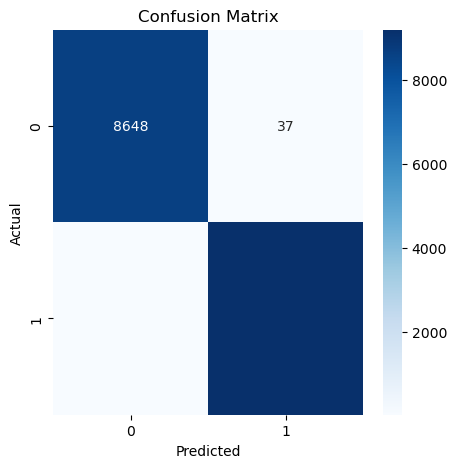

In [75]:
cm = confusion_matrix(y_test, y_pred)
labels = ["True", "Fake"] 

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [76]:
import numpy as np

coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

top_fake = np.argsort(coefficients)[-15:]
print("Top 'Fake' words:", feature_names[top_fake])


Top 'Fake' words: ['mbalula' 'condoms' 'interloper' 'sentimentality' 'khyber' 'enthusiastic'
 'bitkower' 'creates' '8607' 'halls' 'caliph' 'hannachi' 'djamshid'
 'gamethe' 'nadejda']


In [77]:
top_true = np.argsort(coefficients)[:15]
print("Top 'True' words:", feature_names[top_true])

Top 'True' words: ['noland' 'sewage' 'sensenbrenner' 'refusefascism' 'opensociety'
 'leightman' 'edison' 'righties' 'kczfw5f8cp' 'indelible' 'crevice'
 'outdone' 'kew' 'neo' 'herren']
